In [2]:
import pandas as pd

In [7]:
df_data = pd.read_csv('../../data/LUNG_CellLine_ZScore_pivot_heatmap.csv',index_col=0)
df_data.head()

,LCLC.LCLC103H,LCLC.NCIH1299,LUAD.HCC827,LUAD.NCIH2228,LUAD.PC14,LUSC.NCIH2170,LUSC.RERFLCSQ1,NSCLC.CHAGOK1,NSCLC.NCIH2172,SCLC.LU135,SCLC.NCIH146,SCLC.NCIH1963,SCLC.NCIH526
drug,,,,,,,,,,,,,
5-Fluorouracil,0.477670,0.113242,0.628404,0.044028,0.859733,-0.567961,0.270432,0.873811,0.599092,0.064419,0.054809,0.304989,-0.514018
ABT737,0.442016,0.524748,0.465919,0.546333,0.370028,0.356029,0.393804,0.335444,0.426890,-1.130284,-0.494017,-1.151788,-2.251640
AGI-5198,0.331711,0.116441,0.395584,0.252637,0.260275,-0.101050,0.134767,-0.208557,-0.255464,-0.591062,-0.311158,-0.006424,-1.106407
AGI-6780,0.366411,0.257240,0.534912,0.443510,0.572516,-0.100892,0.107959,0.079473,-0.138157,0.014283,0.133168,0.334875,-0.512449
AGK2,0.058037,0.258930,0.484516,0.249110,0.026397,-0.397228,-0.094460,-0.025720,-0.243039,-0.206558,0.037225,0.086900,-0.496433


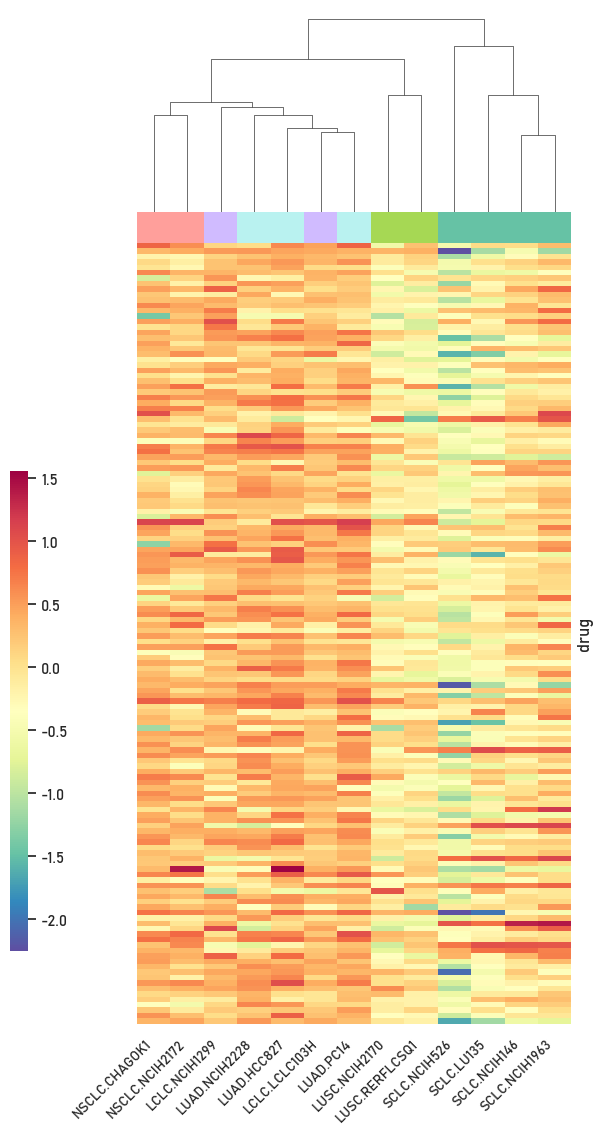

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
palette = {
    'LCLC.LCLC103H':'#d0bbff',
    'LCLC.NCIH1299':'#d0bbff',
    'LUAD.HCC827':'#b9f2f0',
    'LUAD.NCIH2228':'#b9f2f0',
    'LUAD.PC14':'#b9f2f0',
    'LUSC.NCIH2170':'#a6d854',
    'LUSC.RERFLCSQ1':'#a6d854',
    'NSCLC.CHAGOK1':'#ff9f9b',
    'NSCLC.NCIH2172':'#ff9f9b',
    'SCLC.LU135':'#66c2a5',
    'SCLC.NCIH146':'#66c2a5',
    'SCLC.NCIH1963':'#66c2a5',
    'SCLC.NCIH526':'#66c2a5'}
# 创建一个新的列颜色列表，根据你的数据的列名来指定颜色
col_colors = [palette.get(col) for col in df_data.columns]
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_data.columns
heatmap_data = df_data.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(6,12),
                  # dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False, col_colors=col_colors)

ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left',size=14)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right',size=10)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False

#设置图片名称，分辨率，并保存
plt.savefig('cluster.png',dpi = 300)
plt.show()